In [431]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [432]:
usersDataTrain = pd.read_csv("../setEntrenamiento.csv")

In [433]:
usersDataTrain.columns

Index(['Unnamed: 0', 'person', 'cant_seciones', 'event_checkout',
       'event_conversion', 'event_ad campaign hit', 'event_lead', 'skus',
       'Busca_terminos_populares', 'Computer', 'Smartphone', 'otros',
       'marca_apple', 'marca_asus', 'marca_lenovo', 'marca_lg',
       'marca_motorola', 'marca_samsung', 'marca_sony', 'condition_Bom',
       'condition_Bom - Sem Touch ID', 'condition_Excelente',
       'condition_Muito Bom', 'version_galaxy j7', 'version_galaxy j5',
       'version_galaxy s7', 'version_iphone 6', 'version_iphone 5s',
       'version_iphone 6s', 'version_moto g4', 'version_moto g2',
       'version_galaxy s6', 'storage_128GB', 'storage_16GB', 'storage_256GB',
       'storage_32GB', 'storage_4GB', 'storage_512MB', 'storage_64GB',
       'storage_8GB', 'Parte del dia_Madrugada', 'Parte del dia_Mañana',
       'Parte del dia_Noche', 'Parte del dia_Tarde', 'campaign_source_google',
       'campaign_source_criteo', 'campaign_source_rtbhouse', 'channel_Direct',
    

In [434]:
total_train= usersDataTrain.drop( ['Unnamed: 0','person',"marca_lenovo","marca_lg","marca_sony","marca_asus","event_lead","otros","Brasilero", 'channel_Direct', 'channel_Paid',
       'channel_Organic', 'channel_Referral','version_galaxy s6', 'storage_128GB', 'storage_16GB', 'storage_256GB',
       'storage_32GB', 'storage_4GB', 'storage_512MB', 'storage_64GB',
       'storage_8GB','event_ad campaign hit', 'skus', 'Busca_terminos_populares', 'marca_motorola',
       'condition_Bom', 'condition_Bom - Sem Touch ID', 'condition_Excelente',
       'condition_Muito Bom', 'version_galaxy j7', 'version_galaxy j5',
       'version_galaxy s7', 'version_iphone 6', 'version_iphone 5s',
       'version_iphone 6s', 'version_moto g4', 'version_moto g2','color_Preto',
       'color_Dourado', 'color_Branco', 'color_Cinza espacial', 'Parte del dia_Madrugada','Parte del dia_Mañana',
       'Parte del dia_Noche', 'Parte del dia_Tarde'],axis=1)

In [435]:
total_train.columns

Index(['cant_seciones', 'event_checkout', 'event_conversion', 'Computer',
       'Smartphone', 'marca_apple', 'marca_samsung', 'campaign_source_google',
       'campaign_source_criteo', 'campaign_source_rtbhouse', 'ventas_region',
       'count_activity', 'conversiones_15lastdays', 'checkout_15lastdays',
       'viewed_15lastday', 'new_15lastdays', 'label'],
      dtype='object')

In [436]:
'cant_seciones', 'event_checkout', 'event_conversion', 'Computer',
       'Smartphone', 'campaign_source_google', 'campaign_source_criteo',
       'campaign_source_rtbhouse', 'ventas_region', 'count_activity',
       'conversiones_15lastdays', 'checkout_15lastdays', 'viewed_15lastday',
       'new_15lastdays'

IndentationError: unexpected indent (<ipython-input-436-2e3ad24eb607>, line 2)

In [437]:
total_train.head()

,cant_seciones,event_checkout,event_conversion,Computer,Smartphone,marca_apple,marca_samsung,campaign_source_google,campaign_source_criteo,campaign_source_rtbhouse,ventas_region,count_activity,conversiones_15lastdays,checkout_15lastdays,viewed_15lastday,new_15lastdays,label
0,3,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,3.0,0.0,1.0,0
1,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,17.0,0.0,1.0,3.0,1.0,0
2,1,1.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,19.0,0.0,1.0,4.0,1.0,0
3,21,15.0,2.0,1.0,0.0,1.0,8.0,17.0,5.0,7.0,1213.0,202.0,1.0,3.0,89.0,0.0,0
4,1,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,64.0,7.0,1.0,2.0,2.0,0.0,0


In [438]:
users1s = total_train[total_train["label"] == 1]
users0s = total_train[total_train["label"] == 0].head(980)
total_train = pd.concat([users0s,users1s], ignore_index=True)

total_train["label"].value_counts()

1    980
0    980
Name: label, dtype: int64

In [439]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total_train.drop(['label'], axis=1).values, total_train["label"] , test_size=0.20, random_state=75)




In [440]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [441]:
parameters = {
 "n_estimators":[50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800],
 "max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14],
 "min_child_weight":[2,3,4,5,6,7,8],
 "colsample_bytree":[0.2,0.6,0.8],
 "colsample_bylevel":[0.2,0.6,0.8],
 "gamma":[i/10.0 for i in range(0,10)],
 "silent":[True,False],
 "learning_rate":[0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]
}


In [442]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Create a random forest Classifier. By convention, clf means 'Classifier'

clf =XGBClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.metrics import make_scorer, roc_auc_score
auc = make_scorer(roc_auc_score)


rf_random = RandomizedSearchCV(estimator = clf, param_distributions = parameters, n_iter = 300, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring = auc)
# Fit the random search model
rf_random.fit(X_train_scale, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV] silent=True, n_estimators=200, min_child_weight=5, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV] silent=True, n_estimators=200, min_child_weight=5, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV] silent=True, n_estimators=200, min_child_weight=5, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV] silent=False, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=200, min_child_weight=5, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV]  silent=True, n_estimators=200, min_child_weight=5, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV]  silent=True, n_estimators=200, min_child_weight=5, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=750, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=750, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=750, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=300, min_child_weight=2, max_depth=2, learning_rate=0.15, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=300, min_child_weight=2, max_depth=2, learning_rate=0.15, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=300, min_child_weight=2, max_depth=2, learning_rate=0.15, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=2, max_depth=2, learning_rate=0.15, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=200, min_child_weight=8, max_depth=5, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=2, max_depth=2, learning_rate=0.15, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=200, min_child_weight=8, max_depth=5, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=2, max_depth=2, learning_rate=0.15, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=200, min_child_weight=8, max_depth=5, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=750, min_child_weight=3, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=8, max_depth=5, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=750, min_child_weight=3, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=8, max_depth=5, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.4s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=750, min_child_weight=3, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=8, max_depth=5, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=550, min_child_weight=6, max_depth=7, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=3, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=550, min_child_weight=6, max_depth=7, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=6, max_depth=7, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=550, min_child_weight=6, max_depth=7, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=3, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=3, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=6, max_depth=7, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=6, max_depth=7, learning_rate=0.2, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=650, min_child_weight=2, max_depth=4, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.5s
[CV] silent=False, n_estimators=650, min_child_weight=2, max_depth=4, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.5s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=650, min_child_weight=2, max_depth=4, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=2, max_depth=4, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=2, max_depth=4, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=2, max_depth=4, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.6s
[CV] silent=True, n_estimators=600, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.7s
[CV] silent=True, n_estimators=600, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.7s
[CV] silent=True, n_estimators=600, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.5s
[CV] silent=True, n_estimators=300, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.7s
[CV] silent=True, n_estimators=300, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.6 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.6s
[CV] silent=True, n_estimators=300, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=550, min_child_weight=7, max_depth=7, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.6s
[CV] silent=True, n_estimators=550, min_child_weight=7, max_depth=7, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=550, min_child_weight=7, max_depth=7, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=200, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=7, max_depth=7, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.8s
[CV] silent=False, n_estimators=200, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s
[CV] silent=False, n_estimators=200, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=7, max_depth=7, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.8s
[CV] silent=False, n_estimators=600, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=7, max_depth=7, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.9s
[CV] silent=False, n_estimators=600, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=600, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s
[CV] silent=True, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=550, min_child_weight=4, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.6s
[CV] silent=False, n_estimators=550, min_child_weight=4, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.6s
[CV] silent=False, n_estimators=550, min_child_weight=4, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=4, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=550, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.8s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=550, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=4, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=550, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=4, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.6s
[CV] silent=False, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=600, min_child_weight=2, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.9s
[CV] silent=False, n_estimators=600, min_child_weight=2, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=550, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.9s
[CV]  silent=True, n_estimators=550, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.9s
[CV] silent=False, n_estimators=600, min_child_weight=2, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 
[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=2, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=2, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s
[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=2, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=750, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=750, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=750, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=150, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.7s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=150, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8 
[CV]  silent=False, n_estimators=750, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.7s
[CV] silent=False, n_estimators=150, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.7s
[CV] silent=False, n_estimators=50, min_child_weight=7, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=7, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=7, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=50, min_child_weight=7, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=50, min_child_weight=7, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV]  silent=False, n_estimators=50, min_child_weight=7, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=False, n_estimators=800, min_child_weight=5, max_depth=13, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=False, n_estimators=800, min_child_weight=5, max_depth=13, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=800, min_child_weight=5, max_depth=13, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV]  silent=False, n_estimators=150, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=800, min_child_weight=5, max_depth=13, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV]  silent=False, n_estimators=800, min_child_weight=5, max_depth=13, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV] silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=5, max_depth=13, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.7s
[CV] silent=True, n_estimators=550, min_child_weight=7, max_depth=2, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.7s
[CV] silent=True, n_estimators=550, min_child_weight=7, max_depth=2, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=7, max_depth=2, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=550, min_child_weight=7, max_depth=2, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=7, max_depth=2, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=True, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=True, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=7, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=7, max_depth=2, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=7, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.8s
[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=7, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.8s
[CV] silent=False, n_estimators=650, min_child_weight=3, max_depth=7, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=7, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=7, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=650, min_child_weight=3, max_depth=7, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 
[CV] silent=False, n_estimators=650, min_child_weight=3, max_depth=7, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=7, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=550, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=3, max_depth=7, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s
[CV] silent=False, n_estimators=550, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=3, max_depth=7, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=3, max_depth=7, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s
[CV] silent=False, n_estimators=550, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8 
[CV] silent=True, n_estimators=750, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.2s
[CV] silent=True, n_estimators=750, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.2s
[CV] silent=True, n_estimators=750, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.2s
[CV] silent=False, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.5s
[CV] silent=False, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=14, learning_rate=0.15, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.6s
[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=14, learning_rate=0.15, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=14, learning_rate=0.15, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=14, learning_rate=0.15, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.6s
[CV] silent=True, n_estimators=450, min_child_weight=8, max_depth=13, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.6s
[CV] silent=True, n_estimators=450, min_child_weight=8, max_depth=13, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=14, learning_rate=0.15, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.5s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=14, learning_rate=0.15, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.6s
[CV] silent=True, n_estimators=450, min_child_weight=8, max_depth=13, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=8, max_depth=13, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.6s
[CV] silent=True, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=8, max_depth=13, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.7s
[CV] silent=True, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=8, max_depth=13, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.7s
[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.7s
[CV] silent=False, n_estimators=250, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=250, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=250, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.8s
[CV] silent=False, n_estimators=800, min_child_weight=5, max_depth=7, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.2, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.9s
[CV] silent=False, n_estimators=800, min_child_weight=5, max_depth=7, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=800, min_child_weight=5, max_depth=7, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=5, max_depth=7, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.5s
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=700, min_child_weight=7, max_depth=14, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=800, min_child_weight=5, max_depth=7, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.5s
[CV] silent=False, n_estimators=700, min_child_weight=7, max_depth=14, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV]  silent=False, n_estimators=800, min_child_weight=5, max_depth=7, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.6s
[CV] silent=False, n_estimators=700, min_child_weight=7, max_depth=14, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=400, min_child_weight=5, max_depth=9, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=7, max_depth=14, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.8s
[CV] silent=False, n_estimators=400, min_child_weight=5, max_depth=9, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=7, max_depth=14, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.8s
[CV] silent=False, n_estimators=400, min_child_weight=5, max_depth=9, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=7, max_depth=14, learning_rate=0.15, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.8s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=400, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=5, max_depth=9, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=400, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=5, max_depth=9, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=400, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=5, max_depth=9, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=False, n_estimators=750, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.7s
[CV] silent=False, n_estimators=750, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.7s
[CV] silent=False, n_estimators=750, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.7s
[CV] silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.6s
[CV] silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.7s
[CV] silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.7s
[CV] silent=True, n_estimators=400, min_child_weight=8, max_depth=2, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=8, max_depth=2, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=400, min_child_weight=8, max_depth=2, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=8, max_depth=2, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=400, min_child_weight=8, max_depth=2, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=8, max_depth=2, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=750, min_child_weight=6, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.8s
[CV] silent=False, n_estimators=750, min_child_weight=6, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.8s
[CV] silent=False, n_estimators=750, min_child_weight=6, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=6, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.1s
[CV] silent=False, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.8s
[CV] silent=False, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=750, min_child_weight=6, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.2s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2 
[CV] silent=False, n_estimators=500, min_child_weight=6, max_depth=2, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=6, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.2s
[CV] silent=False, n_estimators=500, min_child_weight=6, max_depth=2, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=500, min_child_weight=6, max_depth=2, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=6, max_depth=2, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=800, min_child_weight=4, max_depth=13, learning_rate=0.025, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=6, max_depth=2, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=800, min_child_weight=4, max_depth=13, learning_rate=0.025, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=800, min_child_weight=4, max_depth=13, learning_rate=0.025, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=6, max_depth=2, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.0s
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.025, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=500, min_child_weight=8, max_depth=6, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=4, max_depth=13, learning_rate=0.025, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   1.2s
[CV] silent=True, n_estimators=500, min_child_weight=8, max_depth=6, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=4, max_depth=13, learning_rate=0.025, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   1.2s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=500, min_child_weight=8, max_depth=6, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=8, max_depth=6, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=4, max_depth=13, learning_rate=0.025, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   1.3s
[CV] silent=True, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=8, max_depth=6, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=8, max_depth=6, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=200, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=200, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV]  silent=True, n_estimators=250, min_child_weight=7, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=200, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV] silent=False, n_estimators=450, min_child_weight=2, max_depth=2, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=450, min_child_weight=2, max_depth=2, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=450, min_child_weight=2, max_depth=2, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=450, min_child_weight=2, max_depth=2, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=450, min_child_weight=2, max_depth=2, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=3, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=3, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV]  silent=False, n_estimators=450, min_child_weight=2, max_depth=2, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=3, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=3, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=3, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=3, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=350, min_child_weight=8, max_depth=6, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=8, max_depth=6, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=350, min_child_weight=8, max_depth=6, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.9s
[CV] silent=False, n_estimators=350, min_child_weight=8, max_depth=6, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=350, min_child_weight=8, max_depth=6, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=450, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.9s
[CV] silent=False, n_estimators=450, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.9s
[CV] silent=False, n_estimators=450, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=8, max_depth=6, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=450, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=450, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.6s
[CV] silent=False, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV]  silent=False, n_estimators=450, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s
[CV] silent=True, n_estimators=250, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8 
[CV] silent=True, n_estimators=250, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=250, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=650, min_child_weight=3, max_depth=6, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=650, min_child_weight=3, max_depth=6, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.025, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.7s
[CV] silent=False, n_estimators=650, min_child_weight=3, max_depth=6, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=True, n_estimators=550, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=550, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=550, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=3, max_depth=6, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.2s
[CV] silent=False, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=650, min_child_weight=3, max_depth=6, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.2s
[CV]  silent=False, n_estimators=650, min_child_weight=3, max_depth=6, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.2s
[CV] silent=False, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8 
[CV] silent=False, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV]  silent=False, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=False, n_estimators=700, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.5s
[CV] silent=False, n_estimators=700, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.5s
[CV] silent=False, n_estimators=700, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.9s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=700, min_child_weight=5, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.9s
[CV] silent=False, n_estimators=700, min_child_weight=5, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.5s
[CV] silent=False, n_estimators=700, min_child_weight=5, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.5s
[CV] silent=False, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.01, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=5, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.01, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=5, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.5s
[CV] silent=False, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.01, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=5, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV] silent=True, n_estimators=750, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.01, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=750, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.01, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=750, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.01, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.2s
[CV]  silent=False, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=400, min_child_weight=3, max_depth=2, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=400, min_child_weight=3, max_depth=2, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=400, min_child_weight=3, max_depth=2, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=3, max_depth=2, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV]  silent=True, n_estimators=400, min_child_weight=3, max_depth=2, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=350, min_child_weight=2, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=350, min_child_weight=2, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=3, max_depth=2, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=350, min_child_weight=2, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=450, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=450, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=450, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=2, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=450, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=2, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.5s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=200, min_child_weight=2, max_depth=2, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=2, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=200, min_child_weight=2, max_depth=2, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=200, min_child_weight=2, max_depth=2, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.3s
[CV]  silent=False, n_estimators=200, min_child_weight=2, max_depth=2, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=200, min_child_weight=2, max_depth=2, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8 
[CV] silent=False, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=450, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=450, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV]  silent=False, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=False, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=False, n_estimators=750, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=750, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=7, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=750, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=2, max_depth=2, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.3s
[CV] silent=False, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.025, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=550, min_child_weight=8, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.6s
[CV] silent=False, n_estimators=550, min_child_weight=8, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.6s
[CV] silent=False, n_estimators=550, min_child_weight=8, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.7s
[CV] silent=False, n_estimators=250, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=8, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.2s
[CV] silent=False, n_estimators=250, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=250, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s
[CV] silent=False, n_estimators=100, min_child_weight=2, max_depth=6, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=100, min_child_weight=2, max_depth=6, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=100, min_child_weight=2, max_depth=6, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV]  silent=False, n_estimators=100, min_child_weight=2, max_depth=6, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=False, n_estimators=100, min_child_weight=2, max_depth=6, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 
[CV] silent=False, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=2, max_depth=6, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=False, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=8, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.5s
[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=8, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.5s
[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.8s
[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=800, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=800, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=800, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.8s
[CV] silent=False, n_estimators=650, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.2s
[CV] silent=False, n_estimators=650, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.3s
[CV] silent=False, n_estimators=650, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.3s
[CV] silent=False, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.4s
[CV] silent=False, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=50, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=50, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV]  silent=False, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.7s
[CV] silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.6s
[CV] silent=False, n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   1.0s
[CV] silent=False, n_estimators=350, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=350, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   1.0s
[CV] silent=False, n_estimators=350, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   1.0s
[CV] silent=True, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.9s
[CV] silent=True, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.8s
[CV] silent=True, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.9s
[CV] silent=True, n_estimators=400, min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.9s
[CV] silent=True, n_estimators=400, min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.3s
[CV] silent=True, n_estimators=400, min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.3s
[CV] silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.9s
[CV] silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=5, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.9s
[CV] silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=350, min_child_weight=8, max_depth=13, learning_rate=0.1, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV]  silent=True, n_estimators=400, min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=350, min_child_weight=8, max_depth=13, learning_rate=0.1, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=350, min_child_weight=8, max_depth=13, learning_rate=0.1, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=8, max_depth=13, learning_rate=0.1, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=8, max_depth=13, learning_rate=0.1, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=8, max_depth=13, learning_rate=0.1, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=650, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.8s
[CV] silent=True, n_estimators=650, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.5s
[CV] silent=True, n_estimators=650, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=750, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=4, max_depth=8, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.9s
[CV] silent=False, n_estimators=750, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=750, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=200, min_child_weight=7, max_depth=3, learning_rate=0.075, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=7, max_depth=3, learning_rate=0.075, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=200, min_child_weight=7, max_depth=3, learning_rate=0.075, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=7, max_depth=3, learning_rate=0.075, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=200, min_child_weight=7, max_depth=3, learning_rate=0.075, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=7, max_depth=3, learning_rate=0.075, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=550, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.5s
[CV] silent=True, n_estimators=550, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.5s
[CV] silent=True, n_estimators=550, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.6s
[CV] silent=False, n_estimators=400, min_child_weight=7, max_depth=14, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.5s
[CV] silent=False, n_estimators=400, min_child_weight=7, max_depth=14, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=400, min_child_weight=7, max_depth=14, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=7, max_depth=14, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=350, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.6s
[CV] silent=True, n_estimators=350, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=7, max_depth=14, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=350, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=7, max_depth=14, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.6s
[CV] silent=True, n_estimators=400, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=400, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.2s
[CV] silent=True, n_estimators=400, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=400, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV]  silent=False, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=True, n_estimators=550, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV] silent=True, n_estimators=550, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=450, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.2s
[CV] silent=True, n_estimators=550, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=600, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=550, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV]  silent=True, n_estimators=550, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=600, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 
[CV] silent=False, n_estimators=600, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=8, max_depth=4, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=650, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s
[CV] silent=False, n_estimators=650, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.6s
[CV] silent=False, n_estimators=650, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=8, max_depth=13, learning_rate=0.075, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.8s
[CV] silent=True, n_estimators=650, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s
[CV] silent=True, n_estimators=650, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=650, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.6s
[CV]  silent=False, n_estimators=650, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=650, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=700, min_child_weight=8, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.7s
[CV]  silent=False, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.7s
[CV] silent=False, n_estimators=700, min_child_weight=8, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV] silent=False, n_estimators=700, min_child_weight=8, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=2, max_depth=13, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=8, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.9s
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=8, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.9s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=350, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV]  silent=False, n_estimators=700, min_child_weight=8, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.9s
[CV] silent=True, n_estimators=350, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2 


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   55.5s
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty 

[CV]  silent=True, n_estimators=350, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV]  silent=True, n_estimators=350, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=350, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.8s
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.8s
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=350, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=350, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=350, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.9s
[CV] silent=True, n_estimators=50, min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.0s
[CV] silent=True, n_estimators=50, min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.9s
[CV] silent=True, n_estimators=50, min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.9s
[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=200, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=200, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=200, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=200, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=250, min_child_weight=7, max_depth=13, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=250, min_child_weight=7, max_depth=13, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=250, min_child_weight=7, max_depth=13, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=600, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=7, max_depth=13, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=600, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=250, min_child_weight=7, max_depth=13, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.2s
[CV]  silent=True, n_estimators=250, min_child_weight=7, max_depth=13, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=600, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.1s
[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.1s
[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.1s
[CV] silent=False, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.2s
[CV] silent=False, n_estimators=600, min_child_weight=7, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=600, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.2s
[CV]  silent=False, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.075, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=600, min_child_weight=7, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=False, n_estimators=600, min_child_weight=7, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.3s
[CV] silent=True, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=7, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV] silent=True, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=7, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV] silent=True, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=7, max_depth=11, learning_rate=0.15, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV] silent=True, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.6s
[CV] silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=450, min_child_weight=7, max_depth=10, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=450, min_child_weight=7, max_depth=10, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.7s
[CV] silent=True, n_estimators=450, min_child_weight=7, max_depth=10, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=8, max_depth=10, learning_rate=0.2, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.6s
[CV] silent=False, n_estimators=200, min_child_weight=8, max_depth=8, learning_rate=0.025, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=7, max_depth=10, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=200, min_child_weight=8, max_depth=8, learning_rate=0.025, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=7, max_depth=10, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=200, min_child_weight=8, max_depth=8, learning_rate=0.025, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=7, max_depth=10, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=8, max_depth=8, learning_rate=0.025, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.6s
[CV] silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV]  silent=False, n_estimators=200, min_child_weight=8, max_depth=8, learning_rate=0.025, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.6s
[CV] silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV] silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV]  silent=False, n_estimators=200, min_child_weight=8, max_depth=8, learning_rate=0.025, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.6s
[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.15, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=True, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 
[CV] silent=False, n_estimators=250, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=250, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=250, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.025, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.025, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.025, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.025, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2 
[CV]  silent=False, n_estimators=250, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.025, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.025, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=250, min_child_weight=2, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=2, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=250, min_child_weight=2, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=2, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=250, min_child_weight=2, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=2, max_depth=14, learning_rate=0.15, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.2s
[CV] silent=False, n_estimators=700, min_child_weight=2, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.9s
[CV] silent=False, n_estimators=700, min_child_weight=2, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.9s
[CV] silent=False, n_estimators=700, min_child_weight=2, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.9s
[CV] silent=True, n_estimators=200, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=200, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=200, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.2, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=2, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.1s
[CV] silent=False, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.2, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=2, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.0s
[CV] silent=False, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.2, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=2, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.0s
[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=2, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.2, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.5s
[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=2, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=2, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=2, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.2, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=2, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.2, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.6s
[CV]  silent=False, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 
[CV] silent=True, n_estimators=50, min_child_weight=3, max_depth=2, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=50, min_child_weight=3, max_depth=2, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.0s
[CV]  silent=False, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.0s
[CV] silent=True, n_estimators=50, min_child_weight=3, max_depth=2, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=50, min_child_weight=3, max_depth=2, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=False, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=2, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=3, max_depth=2, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=3, max_depth=2, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=600, min_child_weight=8, max_depth=12, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=600, min_child_weight=8, max_depth=12, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=600, min_child_weight=8, max_depth=12, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=3, max_depth=10, learning_rate=0.025, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=750, min_child_weight=2, max_depth=11, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=8, max_depth=12, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.8s
[CV] silent=False, n_estimators=750, min_child_weight=2, max_depth=11, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=8, max_depth=12, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.8s
[CV] silent=False, n_estimators=750, min_child_weight=2, max_depth=11, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=8, max_depth=12, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.8s
[CV] silent=True, n_estimators=150, min_child_weight=8, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=8, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.3s
[CV] silent=True, n_estimators=150, min_child_weight=8, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=8, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.3s
[CV] silent=True, n_estimators=150, min_child_weight=8, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=8, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.3s
[CV] silent=True, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=2, max_depth=11, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8, total=   2.0s
[CV] silent=False, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=2, max_depth=11, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8, total=   2.1s
[CV] silent=False, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.6s
[CV] silent=False, n_estimators=550, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.6s
[CV] silent=False, n_estimators=550, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=2, max_depth=11, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8, total=   2.1s
[CV] silent=False, n_estimators=550, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.6s
[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s
[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s
[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=4, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.8s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=50, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=50, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.0s
[CV] silent=True, n_estimators=50, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=50, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV]  silent=True, n_estimators=50, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.0s
[CV] silent=True, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=350, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=350, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=350, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=12, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.025, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.025, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.025, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.7s
[CV] silent=True, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.025, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.025, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=50, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.0s
[CV] silent=True, n_estimators=50, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.7s
[CV] silent=True, n_estimators=50, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.0s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=150, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.0s
[CV] silent=True, n_estimators=150, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.025, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=150, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2 
[CV]  silent=False, n_estimators=350, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=650, min_child_weight=8, max_depth=14, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=650, min_child_weight=8, max_depth=14, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=650, min_child_weight=8, max_depth=14, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=5, max_depth=8, learning_rate=0.075, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=600, min_child_weight=6, max_depth=14, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=6, max_depth=14, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=600, min_child_weight=6, max_depth=14, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=6, max_depth=14, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=600, min_child_weight=6, max_depth=14, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=8, max_depth=14, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.3s
[CV] silent=False, n_estimators=350, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=6, max_depth=14, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=False, n_estimators=350, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=8, max_depth=14, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.3s
[CV] silent=False, n_estimators=350, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=8, max_depth=14, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.3s
[CV] silent=True, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.6s
[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.5s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 
[CV]  silent=True, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=350, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.6s
[CV] silent=True, n_estimators=250, min_child_weight=3, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=3, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=250, min_child_weight=3, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=3, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=250, min_child_weight=3, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=3, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=400, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=400, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=400, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=400, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.8s
[CV] silent=True, n_estimators=400, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.8s
[CV] silent=True, n_estimators=400, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.8s
[CV] silent=False, n_estimators=650, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s
[CV] silent=False, n_estimators=650, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s
[CV] silent=False, n_estimators=650, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s
[CV] silent=False, n_estimators=250, min_child_weight=5, max_depth=2, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=5, max_depth=2, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=250, min_child_weight=5, max_depth=2, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.6s
[CV] silent=False, n_estimators=250, min_child_weight=5, max_depth=2, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=5, max_depth=2, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.6s
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.6s
[CV] silent=False, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=5, max_depth=2, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.0s
[CV] silent=True, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV]  silent=True, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=False, n_estimators=800, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=False, n_estimators=800, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV]  silent=True, n_estimators=800, min_child_weight=6, max_depth=5, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=False, n_estimators=800, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=7, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=7, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=7, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=7, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=7, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=7, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=450, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=450, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.4s
[CV] silent=True, n_estimators=450, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.4s
[CV] silent=False, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=4, max_depth=5, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.4s
[CV] silent=False, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=3, max_depth=2, learning_rate=0.075, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.6s
[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.5s
[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.5s
[CV] silent=False, n_estimators=800, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=800, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6 
[CV]  silent=False, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.5s
[CV] silent=False, n_estimators=800, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=11, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s
[CV] silent=False, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.0s
[CV] silent=False, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=800, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.0s
[CV] silent=False, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.2s
[CV] silent=False, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.1s
[CV] silent=True, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=600, min_child_weight=7, max_depth=7, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.4s
[CV] silent=True, n_estimators=600, min_child_weight=7, max_depth=7, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.4s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=600, min_child_weight=7, max_depth=7, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6 
[CV]  silent=True, n_estimators=600, min_child_weight=7, max_depth=7, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.9s
[CV] silent=True, n_estimators=200, min_child_weight=8, max_depth=12, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.4s
[CV] silent=True, n_estimators=200, min_child_weight=8, max_depth=12, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=8, max_depth=12, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=200, min_child_weight=8, max_depth=12, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=8, max_depth=12, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=350, min_child_weight=3, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=8, max_depth=12, learning_rate=0.01, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=350, min_child_weight=3, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=3, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=350, min_child_weight=3, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=7, max_depth=7, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.1s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=4, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=7, max_depth=7, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.0s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=4, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=4, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=4, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=4, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=3, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=3, max_depth=6, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.2s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=3, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=3, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=750, min_child_weight=5, max_depth=3, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=4, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s
[CV] silent=False, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=3, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=9, learning_rate=0.05, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=3, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=9, learning_rate=0.05, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=5, max_depth=3, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=9, learning_rate=0.05, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.075, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=200, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=200, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=200, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=9, learning_rate=0.05, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.8s
[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=9, learning_rate=0.05, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   1.0s
[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=9, learning_rate=0.05, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   1.1s
[CV] silent=False, n_estimators=550, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=550, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.2s
[CV] silent=False, n_estimators=550, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.2s
[CV] silent=False, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=14, learning_rate=0.025, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.3s
[CV] silent=False, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.6s
[CV] silent=False, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=50, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.0s
[CV] silent=False, n_estimators=50, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.0s
[CV] silent=False, n_estimators=50, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=250, min_child_weight=2, max_depth=10, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2, total=   1.0s
[CV] silent=False, n_estimators=250, min_child_weight=2, max_depth=10, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.9s
[CV]  silent=False, n_estimators=250, min_child_weight=2, max_depth=10, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=250, min_child_weight=2, max_depth=10, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8 
[CV] silent=True, n_estimators=350, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.9s
[CV] silent=True, n_estimators=350, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=350, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=750, min_child_weight=8, max_depth=10, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=2, max_depth=10, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=750, min_child_weight=8, max_depth=10, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=2, max_depth=10, learning_rate=0.1, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=750, min_child_weight=8, max_depth=10, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=8, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=650, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.6s
[CV] silent=True, n_estimators=650, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=750, min_child_weight=8, max_depth=10, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.3s
[CV] silent=True, n_estimators=650, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=8, max_depth=10, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.3s
[CV] silent=True, n_estimators=550, min_child_weight=2, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=8, max_depth=10, learning_rate=0.01, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.4s
[CV] silent=True, n_estimators=550, min_child_weight=2, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.7s
[CV] silent=True, n_estimators=550, min_child_weight=2, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=2, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=2, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=2, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=650, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.7s
[CV]  silent=False, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV]  silent=False, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=False, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.05, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.2s
[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV]  silent=False, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.1, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=800, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=800, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.6s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=800, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.2, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=650, min_child_weight=8, max_depth=2, learning_rate=0.1, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=8, max_depth=2, learning_rate=0.1, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=650, min_child_weight=8, max_depth=2, learning_rate=0.1, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.9s
[CV] silent=False, n_estimators=650, min_child_weight=8, max_depth=2, learning_rate=0.1, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.8s
[CV] silent=True, n_estimators=600, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.6min
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=600, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.9s
[CV] silent=True, n_estimators=600, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=8, max_depth=2, learning_rate=0.1, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s
[CV] silent=False, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=8, max_depth=2, learning_rate=0.1, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.6s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV]  silent=True, n_estimators=600, min_child_weight=3, max_depth=2, learning_rate=0.15, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=10, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.9s
[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=10, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.9s
[CV]  silent=False, n_estimators=700, min_child_weight=5, max_depth=7, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.9s
[CV] silent=True, n_estimators=650, min_child_weight=6, max_depth=10, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=10, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.2s
[CV] silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=750, min_child_weight=7, max_depth=14, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=750, min_child_weight=7, max_depth=14, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=7, max_depth=14, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.7s
[CV] silent=False, n_estimators=750, min_child_weight=7, max_depth=14, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=7, max_depth=14, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.6s
[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.0s
[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=10, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.4s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=6, max_depth=10, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.075, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.075, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.0s
[CV] silent=True, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.075, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=7, max_depth=14, learning_rate=0.2, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.9s
[CV] silent=True, n_estimators=700, min_child_weight=4, max_depth=2, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.075, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.9s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=700, min_child_weight=4, max_depth=2, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=4, max_depth=2, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.5s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=700, min_child_weight=4, max_depth=2, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 
[CV]  silent=True, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.075, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.9s
[CV] silent=False, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=7, max_depth=4, learning_rate=0.075, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.9s
[CV] silent=False, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=4, max_depth=2, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.4s
[CV] silent=False, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=4, max_depth=2, learning_rate=0.05, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=650, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=650, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=True, n_estimators=650, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.2s
[CV] silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=650, min_child_weight=4, max_depth=6, learning_rate=0.15, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=350, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=350, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=350, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=350, min_child_weight=3, max_depth=14, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=2, learning_rate=0.2, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=200, min_child_weight=8, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=200, min_child_weight=8, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=200, min_child_weight=8, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=200, min_child_weight=8, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV]  silent=False, n_estimators=500, min_child_weight=7, max_depth=13, learning_rate=0.025, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.6, total=   1.0s
[CV] silent=False, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=8, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=8, max_depth=6, learning_rate=0.075, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=11, learning_rate=0.025, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=11, learning_rate=0.025, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.6s
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=11, learning_rate=0.025, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=2, learning_rate=0.2, gamma=0.3, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.0s
[CV] silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.0s
[CV] silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.025, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.0s
[CV] silent=True, n_estimators=500, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=11, learning_rate=0.025, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=True, n_estimators=500, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=11, learning_rate=0.025, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=500, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=11, learning_rate=0.025, gamma=0.8, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=250, min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.7s
[CV] silent=False, n_estimators=250, min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.8s
[CV] silent=False, n_estimators=250, min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.8s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 
[CV]  silent=False, n_estimators=250, min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.7s
[CV] silent=False, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=250, min_child_weight=3, max_depth=12, learning_rate=0.15, gamma=0.7, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.7s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.6s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV]  silent=False, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.6s
[CV] silent=True, n_estimators=400, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=6, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.7s
[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=6, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=700, min_child_weight=6, max_depth=6, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8 
[CV]  silent=True, n_estimators=400, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=800, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=6, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.6s
[CV] silent=False, n_estimators=800, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=6, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.5s
[CV]  silent=True, n_estimators=700, min_child_weight=6, max_depth=6, learning_rate=0.2, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.6s
[CV] silent=False, n_estimators=800, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV] silent=False, n_estimators=800, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.7s
[CV] silent=False, n_estimators=800, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.8s
[CV] silent=False, n_estimators=800, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=6, max_depth=14, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.7s
[CV] silent=True, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.5s
[CV] silent=True, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=True, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.5s
[CV] silent=False, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.9, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.5s
[CV] silent=False, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.9s
[CV] silent=True, n_estimators=450, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=2, max_depth=12, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.9s
[CV] silent=True, n_estimators=450, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=450, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.6s
[CV] silent=True, n_estimators=450, min_child_weight=4, max_depth=2, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=4, max_depth=2, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=450, min_child_weight=4, max_depth=2, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=4, max_depth=2, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=True, n_estimators=450, min_child_weight=4, max_depth=2, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=4, max_depth=2, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.2s
[CV] silent=False, n_estimators=650, min_child_weight=6, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=False, n_estimators=650, min_child_weight=6, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=False, n_estimators=650, min_child_weight=6, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=False, n_estimators=500, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=500, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV]  silent=False, n_estimators=650, min_child_weight=6, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.7s
[CV] silent=False, n_estimators=500, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=6, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.6s
[CV] silent=False, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=6, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.7s
[CV] silent=False, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s
[CV] silent=False, n_estimators=750, min_child_weight=7, max_depth=4, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.3s
[CV] silent=False, n_estimators=750, min_child_weight=7, max_depth=4, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=500, min_child_weight=8, max_depth=5, learning_rate=0.075, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.7s
[CV] silent=False, n_estimators=750, min_child_weight=7, max_depth=4, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=7, max_depth=4, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.7s
[CV] silent=False, n_estimators=50, min_child_weight=6, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=6, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=6, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=False, n_estimators=50, min_child_weight=6, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=6, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8 
[CV]  silent=False, n_estimators=50, min_child_weight=6, max_depth=12, learning_rate=0.075, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=True, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=7, max_depth=4, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   1.0s
[CV] silent=True, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=7, max_depth=4, learning_rate=0.2, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.8s
[CV] silent=True, n_estimators=450, min_child_weight=2, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=450, min_child_weight=2, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV]  silent=True, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.3s
[CV] silent=True, n_estimators=450, min_child_weight=2, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.3s
[CV] silent=True, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV]  silent=True, n_estimators=450, min_child_weight=2, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV] silent=True, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV]  silent=True, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.9, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=450, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=450, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=2, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=450, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=2, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=600, min_child_weight=6, max_depth=5, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=600, min_child_weight=6, max_depth=5, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=600, min_child_weight=6, max_depth=5, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=8, max_depth=7, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=450, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=6, max_depth=5, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV] silent=True, n_estimators=450, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=600, min_child_weight=6, max_depth=5, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV]  silent=False, n_estimators=600, min_child_weight=6, max_depth=5, learning_rate=0.05, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.6s
[CV]  silent=True, n_estimators=450, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=450, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.5s
[CV] silent=True, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=450, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.4s
[CV]  silent=True, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.2s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2 
[CV]  silent=True, n_estimators=450, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=7, max_depth=10, learning_rate=0.15, gamma=0.7, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=False, n_estimators=50, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=50, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV]  silent=False, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6 
[CV] silent=False, n_estimators=700, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.2s
[CV] silent=False, n_estimators=700, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.2s
[CV] silent=False, n_estimators=700, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.2s
[CV] silent=False, n_estimators=550, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.0s
[CV] silent=False, n_estimators=550, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=700, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.9s
[CV] silent=False, n_estimators=550, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=700, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8, total=   2.0s
[CV] silent=True, n_estimators=600, min_child_weight=4, max_depth=7, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8 
[CV]  silent=False, n_estimators=700, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.8, total=   2.0s
[CV] silent=True, n_estimators=600, min_child_weight=4, max_depth=7, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.1s
[CV] silent=True, n_estimators=600, min_child_weight=4, max_depth=7, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, colsample_bylevel=0.6, total=   1.1s
[CV] silent=True, n_estimators=150, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=150, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=4, max_depth=7, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.0s
[CV] silent=True, n_estimators=150, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=4, max_depth=7, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.1s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=4, max_depth=7, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=True, n_estimators=50, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=50, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=50, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=4, max_depth=9, learning_rate=0.025, gamma=0.3, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.0s
[CV] silent=True, n_estimators=50, min_child_weight=8, max_depth=3, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=8, max_depth=3, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.0s
[CV] silent=True, n_estimators=50, min_child_weight=8, max_depth=3, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=8, max_depth=3, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.0s
[CV] silent=True, n_estimators=50, min_child_weight=8, max_depth=3, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=8, max_depth=3, learning_rate=0.1, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.0s
[CV] silent=True, n_estimators=500, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=500, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.6s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.6s
[CV] silent=True, n_estimators=500, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8 
[CV] silent=False, n_estimators=750, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=500, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=750, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.6s
[CV] silent=False, n_estimators=750, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=500, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.5s
[CV]  silent=False, n_estimators=750, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.8 
[CV] silent=False, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.6s
[CV] silent=False, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=750, min_child_weight=6, max_depth=2, learning_rate=0.15, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=550, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.2s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=550, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 
[CV]  silent=False, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=550, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.6, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.1s
[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=550, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=300, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6 
[CV]  silent=True, n_estimators=550, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.3s
[CV] silent=False, n_estimators=650, min_child_weight=8, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.6s
[CV] silent=False, n_estimators=650, min_child_weight=8, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=8, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=650, min_child_weight=8, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.7s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=300, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.7s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=8, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=650, min_child_weight=8, max_depth=3, learning_rate=0.025, gamma=0.6, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=False, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.075, gamma=0.3, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.1s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   1.0s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.9s
[CV] silent=False, n_estimators=800, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.8, total=   1.2s
[CV] silent=True, n_estimators=600, min_child_weight=4, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=4, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=600, min_child_weight=4, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=True, n_estimators=600, min_child_weight=4, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=False, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=800, min_child_weight=8, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.1s
[CV] silent=False, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=600, min_child_weight=4, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.6s
[CV]  silent=False, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.2s
[CV] silent=False, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6 
[CV] silent=True, n_estimators=600, min_child_weight=4, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.2s
[CV] silent=True, n_estimators=600, min_child_weight=4, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=4, max_depth=2, learning_rate=0.15, gamma=0.6, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=True, n_estimators=600, min_child_weight=4, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.8, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=4, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=4, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=600, min_child_weight=4, max_depth=4, learning_rate=0.075, gamma=0.0, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.4s
[CV] silent=False, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=False, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.6s
[CV] silent=False, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=True, n_estimators=700, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.8s
[CV] silent=True, n_estimators=700, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.6s
[CV] silent=True, n_estimators=700, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=8, max_depth=10, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.6s
[CV] silent=True, n_estimators=800, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=800, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=True, n_estimators=800, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=8, max_depth=11, learning_rate=0.15, gamma=0.9, colsample_bytree=0.2, colsample_bylevel=0.6, total=   0.4s
[CV] silent=False, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.9s
[CV] silent=False, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.8s
[CV] silent=False, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV]  silent=True, n_estimators=700, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, colsample_bylevel=0.8, total=   1.8s
[CV] silent=False, n_estimators=600, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2 
[CV] silent=False, n_estimators=600, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=False, n_estimators=600, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.5, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.5s
[CV] silent=True, n_estimators=150, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=150, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=True, n_estimators=150, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=150, min_child_weight=8, max_depth=8, learning_rate=0.01, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=False, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 
[CV]  silent=False, n_estimators=600, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.8s
[CV] silent=False, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.025, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.8s
[CV] silent=False, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.025, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.025, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.1s
[CV] silent=False, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.025, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=600, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.8s
[CV] silent=False, n_estimators=550, min_child_weight=3, max_depth=11, learning_rate=0.075, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.025, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.4s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=550, min_child_weight=3, max_depth=11, learning_rate=0.075, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.025, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.4s
[CV] silent=False, n_estimators=550, min_child_weight=3, max_depth=11, learning_rate=0.075, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.025, gamma=0.8, colsample_bytree=0.6, colsample_bylevel=0.6, total=   0.3s
[CV] silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=300, min_child_weight=5, max_depth=14, learning_rate=0.05, gamma=0.7, colsample_bytree=0.8, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=800, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=3, max_depth=11, learning_rate=0.075, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.8s
[CV] silent=True, n_estimators=800, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.5s
[CV] silent=True, n_estimators=800, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=3, max_depth=11, learning_rate=0.075, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.8s
[CV] silent=False, n_estimators=400, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=550, min_child_weight=3, max_depth=11, learning_rate=0.075, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.8s
[CV] silent=False, n_estimators=400, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.6s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=False, n_estimators=400, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 
[CV]  silent=False, n_estimators=400, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=800, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.5, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.6s
[CV] silent=True, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.1s
[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.2, gamma=0.1, colsample_bytree=0.6, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=250, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=11, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8 
[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=11, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=250, min_child_weight=4, max_depth=4, learning_rate=0.2, gamma=0.8, colsample_bytree=0.2, colsample_bylevel=0.8, total=   0.2s
[CV] silent=True, n_estimators=700, min_child_weight=5, max_depth=11, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.7s
[CV] silent=False, n_estimators=400, min_child_weight=6, max_depth=11, learning_rate=0.075, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=6, max_depth=11, learning_rate=0.075, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=False, n_estimators=400, min_child_weight=6, max_depth=11, learning_rate=0.075, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=6, max_depth=11, learning_rate=0.075, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.4s
[CV] silent=False, n_estimators=400, min_child_weight=6, max_depth=11, learning_rate=0.075, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=False, n_estimators=400, min_child_weight=6, max_depth=11, learning_rate=0.075, gamma=0.2, colsample_bytree=0.2, colsample_bylevel=0.2, total=   0.3s
[CV] silent=True, n_estimators=750, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will r

[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=11, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.9s
[CV] silent=True, n_estimators=750, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6 


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=11, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.8s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] silent=True, n_estimators=750, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6 
[CV]  silent=True, n_estimators=700, min_child_weight=5, max_depth=11, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, colsample_bylevel=0.8, total=   1.9s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.3s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.1s


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  silent=True, n_estimators=750, min_child_weight=3, max_depth=8, learning_rate=0.025, gamma=0.2, colsample_bytree=0.8, colsample_bylevel=0.6, total=   1.2s


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=300, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_child_weight': [2, 3, 4, 5, 6, 7, 8], 'colsample_bytree': [0.2, 0.6, 0.8], 'colsample_bylevel': [0.2, 0.6, 0.8], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'silent': [True, False], 'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]},
          pre_dispatch='2*n_jobs

In [443]:
rf_random.best_params_

{'colsample_bylevel': 0.6,
 'colsample_bytree': 0.6,
 'gamma': 0.8,
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 4,
 'n_estimators': 700,
 'silent': True}

In [444]:
clf =XGBClassifier(
colsample_bylevel= 0.6,
 colsample_bytree= 0.6,
 gamma = 0.8,
 learning_rate = 0.05,
 max_depth = 2,
 min_child_weight = 4,
 n_estimators = 700,
 silent = True
)


In [445]:
clf.fit(X_train_scale, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
       colsample_bytree=0.6, gamma=0.8, learning_rate=0.05,
       max_delta_step=0, max_depth=2, min_child_weight=4, missing=None,
       n_estimators=700, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [446]:
result = clf.predict_proba(X_test_scale)

In [447]:
result2 = []
for elem in result:
    result2.append(elem[1])

In [448]:
from sklearn import metrics
pred = result2
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
metrics.auc(fpr, tpr)

0.8839274090660556

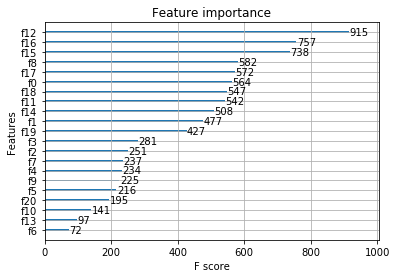

In [397]:
from xgboost import plot_importance
from matplotlib import pyplot
from matplotlib.pyplot import figure


plot_importance(clf)
pyplot.show()

In [145]:
'cant_seciones', 'event_checkout', 'event_conversion', 'Computer',
       'Smartphone', 'marca_apple', 'marca_motorola', 'marca_samsung',
       'campaign_source_google', 'campaign_source_criteo',
       'campaign_source_rtbhouse', 'ventas_region', 'count_activity',
       'conversiones_15lastdays', 'checkout_15lastdays', 'viewed_15lastday',
       'color_Preto', 'color_Dourado', 'color_Branco', 'color_Cinza espacial',
       'new_15lastdays', 'label'

IndentationError: unexpected indent (<ipython-input-145-953d72940095>, line 2)

[0.12922174 0.09251101 0.05286344 0.0660793  0.10132159 0.09544787
 0.07048458 0.06754772 0.14096916 0.1277533  0.05580029]


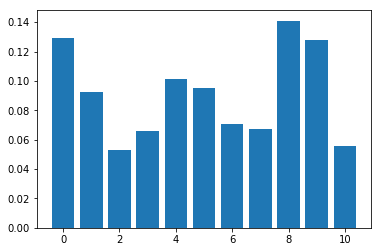

In [211]:
from matplotlib import pyplot
# feature importance
print(clf.feature_importances_)
# plot
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

In [138]:
test = pd.read_csv('../setTest+labelenconde.csv')

In [139]:
test.columns

Index(['Unnamed: 0', 'person', 'cant_seciones', 'event_checkout',
       'event_conversion', 'event_ad campaign hit', 'event_lead', 'skus',
       'Busca_terminos_populares', 'Computer', 'Smartphone', 'otros',
       'marca_apple', 'marca_asus', 'marca_lenovo', 'marca_lg',
       'marca_motorola', 'marca_samsung', 'marca_sony', 'condition_Bom',
       'condition_Bom - Sem Touch ID', 'condition_Excelente',
       'condition_Muito Bom', 'version_galaxy j7', 'version_galaxy j5',
       'version_galaxy s7', 'version_iphone 6', 'version_iphone 5s',
       'version_iphone 6s', 'version_moto g4', 'version_moto g2',
       'version_galaxy s6', 'storage_128GB', 'storage_16GB', 'storage_256GB',
       'storage_32GB', 'storage_4GB', 'storage_512MB', 'storage_64GB',
       'storage_8GB', 'Parte del dia_Madrugada', 'Parte del dia_Mañana',
       'Parte del dia_Noche', 'Parte del dia_Tarde', 'campaign_source_google',
       'campaign_source_criteo', 'campaign_source_rtbhouse', 'channel_Direct',
    

In [140]:
person = test["person"]

In [141]:
person.head()

0    4886f805
1    0297fc1e
2    2d681dd8
3    cccea85e
4    4c8a8b93
Name: person, dtype: object

In [143]:
test = test.drop(['Unnamed: 0','person',"marca_lenovo","marca_lg","marca_sony","marca_asus","event_lead","otros","Brasilero",'Parte del dia_Madrugada',
       'Parte del dia_Mañana', 'Parte del dia_Noche', 'Parte del dia_Tarde', 'channel_Direct', 'channel_Paid',
       'channel_Organic', 'channel_Referral','version_galaxy s6', 'storage_128GB', 'storage_16GB', 'storage_256GB',
       'storage_32GB', 'storage_4GB', 'storage_512MB', 'storage_64GB',
       'storage_8GB','event_ad campaign hit', 'skus', 'Busca_terminos_populares', 'marca_apple', 'marca_motorola', 'marca_samsung',
       'condition_Bom', 'condition_Bom - Sem Touch ID', 'condition_Excelente',
       'condition_Muito Bom', 'version_galaxy j7', 'version_galaxy j5',
       'version_galaxy s7', 'version_iphone 6', 'version_iphone 5s',
       'version_iphone 6s', 'version_moto g4', 'version_moto g2','color_Preto',
       'color_Dourado', 'color_Branco', 'color_Cinza espacial',
       'conversiones_15lastdays', 'viewed_15lastday',
       'label_region_encoding'],axis=1)

In [144]:
nombreCol = []
for namecolumn in total_train.columns:
     if ( not namecolumn in test.columns):
            nombreCol.append(namecolumn)
print(nombreCol)
for namecolumn in test.columns:
     if ( not namecolumn in total_train.columns):
            nombreCol.append(namecolumn)
print(nombreCol)

['label']
['label']


In [145]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
test_scale = scaler.fit_transform(test)


In [146]:
test.head()

,cant_seciones,event_checkout,event_conversion,Computer,Smartphone,campaign_source_google,campaign_source_criteo,campaign_source_rtbhouse,ventas_region,count_activity,checkout_15lastdays,new_15lastdays,label_city_encoding
0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0
1,96,7.0,0.0,0.0,1.0,4.0,5.0,18.0,0.0,126.0,1.0,0.0,1.0
2,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,26.0,1.0,1.0,0.0
3,28,1.0,0.0,1.0,0.0,11.0,2.0,1.0,0.0,519.0,0.0,0.0,11.0
4,20,2.0,0.0,0.0,1.0,8.0,0.0,1.0,0.0,257.0,2.0,1.0,2.0


In [147]:
test.columns

Index(['cant_seciones', 'event_checkout', 'event_conversion', 'Computer',
       'Smartphone', 'campaign_source_google', 'campaign_source_criteo',
       'campaign_source_rtbhouse', 'ventas_region', 'count_activity',
       'checkout_15lastdays', 'new_15lastdays', 'label_city_encoding'],
      dtype='object')

In [148]:
result = clf.predict_proba(test_scale)

In [149]:
result2 = []
for elem in result:
    result2.append(elem[1])

In [150]:
person = person.to_frame()

In [151]:
person['label'] = result2

In [152]:
person.head()

,person,label
0,4886f805,0.066822
1,0297fc1e,0.441643
2,2d681dd8,0.098777
3,cccea85e,0.878520
4,4c8a8b93,0.393458


In [153]:
(person["label"]<0.5).value_counts()

True     14959
False     4456
Name: label, dtype: int64

In [154]:
kaggle = pd.read_csv('../data/trocafone_kaggle_test.csv')

In [155]:
resultado = pd.merge(kaggle,person,on="person",how = "left")

In [156]:
resultado["label"].isnull().value_counts()

False    19415
Name: label, dtype: int64

In [157]:
resultado.to_csv('resultadoXGBoosting3.csv', index=False)